# Que sige luego de maximizar $J(\theta)$?
Supongamos que tenemos 3 dimensiones y queremos elegir las dos principales.

El truco es escoger el radio Rayleigh pero con la restriccion de que los datos ahora viven en el espacio ortogonal a $u$ donde $u_1$ es la direccion principal.


$$ R(A, u) = \max_{\| u  \| = 1, u \perp u_1} u^T X^T X u .$$

Este maximo corresponde al segundo autovalor (en tamanho), el autovector correspondiente seria $u_2$.

Luego los vectores $u_1, u_2$ definen un plano.
La proxima direccion a buscar es la perpendicular a este plano. Seguimos de la misma forma y obtenemos una cadena

$$\lambda_1 \ge \lambda_2 \ge \lambda_2 \ge \cdots \ge \lambda_r \ge 0 .$$
Si la matriz $A=X^T X$ es no singular entonces $r = n$, $\lambda_r = \lambda_n > 0$.

Este proceso es **precisamente** lo que SVD hace.

En SVD buscamos los autovalores $\lambda_i$ de $X^T X$. Estos serian los $\sigma_i^2$ donde
$\sigma_i^2 = \lambda_i$ son los **valores singulares**.






Esto implica una conexion fuerte entre PCA y SVD.

## Reduccion de dimensionalidad usando PCA
La reduccion de dimensionalidad nos ayuda en compresion de datos entre otras cosas.
Aplicamos SVD a la matriz $X$

$$ X = U \Lambda V^T .$$

Entonces

$$X^T X = (V \Lambda^T U^T)(U \Lambda V^T) = V \Lambda^2 V^T .$$

Una vez tenemos la descomposicion SVD de $X$,
podemos **truncar** los ultimos autovectores de $V$, por que corresponden a autovalores (valores singulares) muy pequenhos (debajo de algun umbral). Al truncar hasta $k$ columnas (autovectores) tenemos


$$W = [ V_1 | V_2 | \cdots | V_k] .$$
$W$ es la forma **truncada** de $V$

Luego vamos a proyectar los datos $X$ (filas) a este nuevo espacio truncado $W$.  Estas proyecciones (recuerden proyeccion en Algebra Lineal) son

$$ z_{ji}= \langle x_j, v_i \rangle  \quad , \quad j=1, \cdots, m \quad  , \quad i=1, \cdots, k.$$

En forma matricial escribimos

$$Z = X W .$$

Aca $X \in \mathbb{R}^{m \times n}$.
$Z \in \mathbb{R}^{m \times k } $
como $k < n$ entonces $Z$ es una forma **comprimida** de $X$.


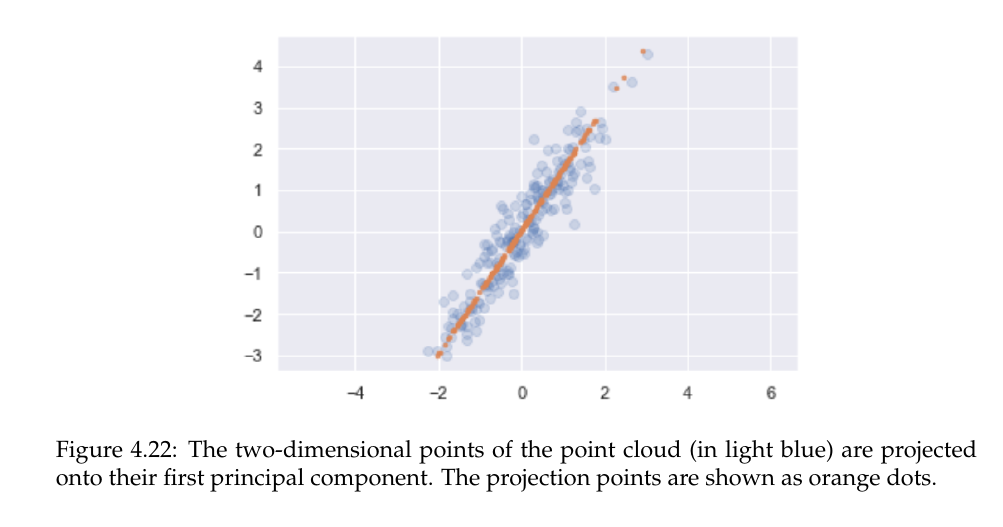

En la figura los puntos azules se proyectan sobre la recta (direccion principal) convirtiendose en los puntos naranja.

Entonces $Z$ es una forma comprimida de $X$, donde $Z$ tiene $k$ columnas, mientras $X$ tiene $n$ columnas y $k < n$.  Estamos **rechazando** "features".
Cuales parametros? aqueyos para los cuales $\lambda_j$, $j > k$, son menores que un umbral.

## Recobro de una aproximacion a los datos originales.

El recobro se da con la multiplicacion de $Z$ por $W^T$.

$$X_{rec} =  Z W^T .$$

Esto es

$$X_{rec} = XW W^T .$$
Si $W$ es "full range" (tiene $n$ columnas, entonces $W W^T = I$, y el recobro es total.
Como en general, $k < n$, entonces el recobro es parcial.
Donde vive $X_{rec}$?

Como $V \in \mathbb{R}^{n \times n}$,
$W \in \mathbb{R}^{n \times k}$,

$$ X_{rec} \in \mathbb{R}^{m \times n} .$$

### El algoritmo de **reducion** PCA mediante SVD es:

* Tome todos los vectores $x_i$ y construya la matrix $X$ (con filas $x_i$).
* Calcule el SVD de $X$
* Estudie los autovalores de $X^T X$, $\sigma_i$
* Obtenga, un $k$ basado en un umbral $u$, es decir seleccione todos aquellos $\sigma_i \ge u$. Como estan ordenados $\sigma_1 \ge \sigma_2, \cdots, \ge \sigma_n$.

* Construya la matriz $W=[V_1 | V_2 | \cdots | V_k ]$

* Proyectamos los datos $X$ de $n$ dimensiones por dato, al nuevo espacio $Z$ con $k$ dimensiones por dato. Son $m$ datos.
Esto se hace con $Z = X W.$









### Recobro al espacio de dimensiones originales.

* Backproject: Se recobran mediante la operacion

$$X_{rec} = Z W^T .$$

## lista de algunos algoritmos para reducir dimensiones.

* PCA (ya lo vimos)
* SVD . Es como el PCA, pero tambien podemos reducir filas (dimensiones $m \to q$, $q<m$.
Se usa mucho en DL, NLP: Procesamiento de Lenguaje Natural.

* Metodo grafico. Usted puede graficar los valores singulares en la vertical contra los indicies en la horizontal.


* NMLk: No negative matrix factorization followed by k-means. Lo lei en un articulo de geotermia.  Vasselinov et. al.

* Autoencoders-Decoders (no es lineal)

## Como se determina el numero de componentes principales.


* **Average squared proyection error**:
Diagmos que la aproximacion del punto $i$
es $x_{approx}^{(i)}$a entonces el error

$$\epsilon = \frac1m \sum_{i=1}^m \| x^{(i)} -x_{approx}^{(i)} \|^2 .$$


* **Procentaje del error de proyeccion medio, con respecto a la variacion total.**

Definamos la variacion total

$$\mathrm{Tot}_{var} = \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 .$$

Vamos a asumir que los datos estan normalizados de forma $\mu= \frac1m \sum_{i=1}^m x^{(i)} = 0$.

El porcentaje en el titulo de este punto es

$$ \frac{\epsilon}{\mathrm{Tot}_{var}} =
 \frac{\frac1m \sum_{i=1}^m \| x^{(i)} -x_{approx}^{(i)} \|^2}{ \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 } \le 0.01$$
 donde $0.01$ lo escojo caprichosamente

 * **la acumulacion relativa de valores singulares**

 $$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} .$$

 * A lo largo de la direccion $v_i$ la varianza, dispersion (salvo una escala) esta dada por $v_i^T X^T X v_i = \sigma_i^2$


 Se puede probar (esto se deja el estudiante, ChatGPT?)

 $$\sum_{i=1}^m \| x^{(i)} \|^2 = \sum_{i=1}^n \sigma_i^2 .$$

 El error visto en $\sigma$s, se puede pensar
 $$E = X - X_{approx} $$, y esto influye en
 los sigmas $\sigma_k, \sigma_{k+1}, \sigma_n$
 que son el residuo de restar la matriz original, menos la proyectada.

\begin{eqnarray*}
      \begin{pmatrix}
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
        \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \ddots & 0 & \ddots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \cdots & 0  & \sigma_{k+1} & 0 & \cdots & \cdots & \vdots \\
        \vdots & \cdots & \cdots & 0 & \sigma_{k+2} &  0 & \cdots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & 0 & \sigma_{n-1} & 0 \\
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \sigma_n
      \end{pmatrix} .
    \end{eqnarray*}










Escribimos esto como


$$\sum_{i=1}^m \| x^{(i)} - x_{approx}^{(i)} \|^2  = \sum_{i={k+1}}^n \sigma_i^2.$$

Entonces

$$\sum_{i=1}^m \| x^{(i)} - x_{approx}^{(i)} \|^2  = \sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2.$$

De forma que

$$ \frac{\epsilon}{\mathrm{Tot}_{var}} =
 \frac{\frac1m \sum_{i=1}^m \| x^{(i)} -x_{approx}^{(i)} \|^2}{ \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 } = \frac{\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} =1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} \le 0.01 $$

 Esto es lo mismo que decir que

 $$ \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} \ge 0.99 .$$

## Aplicaciones de PCA.
* Es util para simplicar el proceso de "clustering" . Para metodos supervisados,
en la reduccion de datos.

* Compresion de datos

* Para visualizacion: El mundo en el tablero, la pantalla y el papel se ve mejor en 2D.

* Aceleracion de procesos. Si los datos son mas pequenhos la memoria el tiempo de corrido se reducen.


Ejemplo extremos. Piense en los siguientes datos

$X = t (a_0, a_1, \cdots, a_{100000})$
$t \in (-\infty, \infty)$.
Es una recta en $\mathbb{R}^{100000}$
Este problema se puede reducir a una dimension.

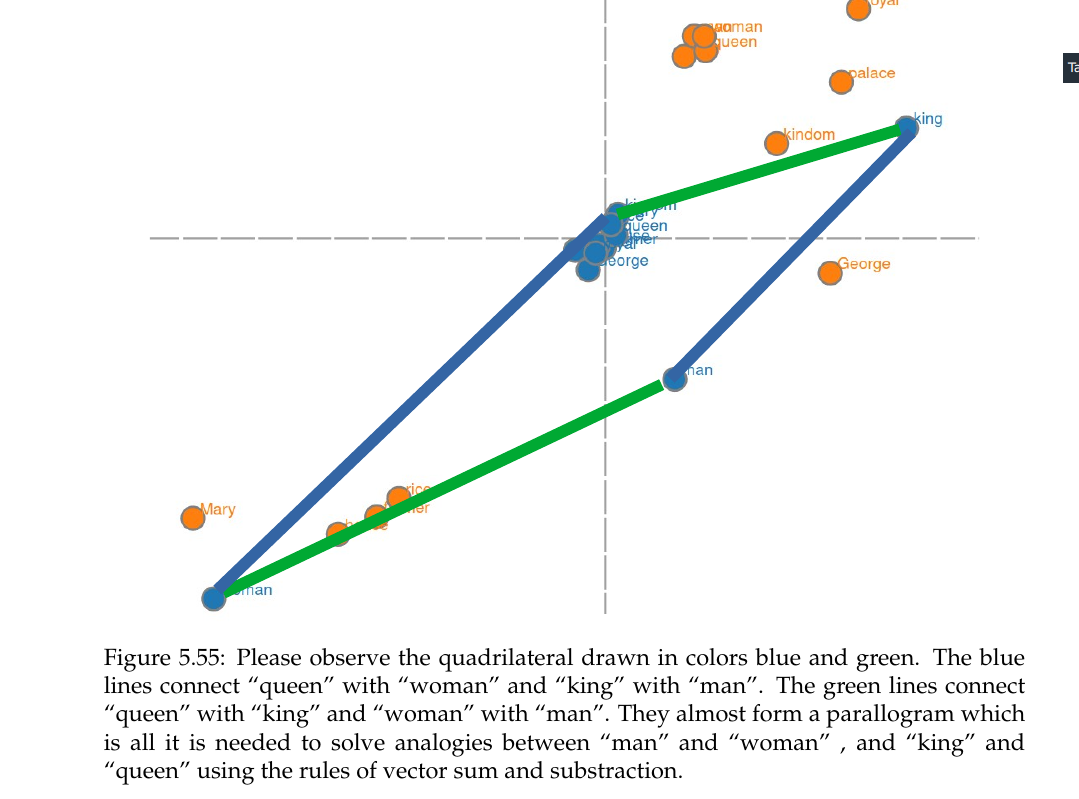

# Proxima clase: Anomaly Detection.